In [19]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import torch
import os
import re
import os
import json
import math
from pprint import pprint

In [20]:
# logs are in directories: llm_thesis_logs/unlearn.py-{params}/train
# and llm_thesis_logs/unlearn.py-{params}/validation
# collect all of the data

# for unlearn.py-params file in llm_thesislogs:
logsdir = "llm_thesis_logs"
data = []

for exp_dir in (f.path for f in os.scandir(logsdir) if f.is_dir()):
    params = [
        (x.split("=")[0], x.split("=")[1])
        for x in re.findall("[a-z]+=[a-zA-Z0-9\.-]+", exp_dir)
    ]
    params[6] = ("lrate", params[6][1])
    params = {x[0]: x[1] for x in params}
    with open(exp_dir + "/evaluation_results.jsonl") as f:
        results = json.load(f)
    joined = {**params, **results}
    data.append(joined)

data[0]

<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Xelf\AppData\Local\Temp\ipykernel_21584\2651418696.py:12: SyntaxWarning: invalid escape sequence '\.'
  for x in re.findall("[a-z]+=[a-zA-Z0-9\.-]+", exp_dir)


{'bs': '4',
 'b': '0.5',
 'd': 'None',
 'e': '20',
 'ee': '5',
 'km': '0.5',
 'lrate': '0.0001',
 'lme': '-1',
 'lr': '10',
 'm': '7B',
 'nm': '1.0',
 'rm': '1.0',
 'sln': 'True',
 'sm': 'True',
 's': '42',
 't': '4',
 'forget-set': {'overall-regurgitation-score': 0.39353767501737613,
  'overall-knowledge-score': 0.5028901734104047,
  'Task1': {'regurgitation-score': 0.4356288038276354,
   'knowledge-score': 0.5416666666666666},
  'Task2': {'regurgitation-score': 0.418367839889579,
   'knowledge-score': 0.48695652173913045},
  'Task3': {'regurgitation-score': 0.34702941373776175,
   'knowledge-score': 0.5294117647058824}},
 'retain-set': {'overall-regurgitation-score': 0.41220222070556284,
  'overall-knowledge-score': 0.4603174603174603,
  'Task1': {'regurgitation-score': 0.448825950589193,
   'knowledge-score': 0.5185185185185185},
  'Task2': {'regurgitation-score': 0.40911304646821894,
   'knowledge-score': 0.448},
  'Task3': {'regurgitation-score': 0.38756407608598414,
   'knowledge

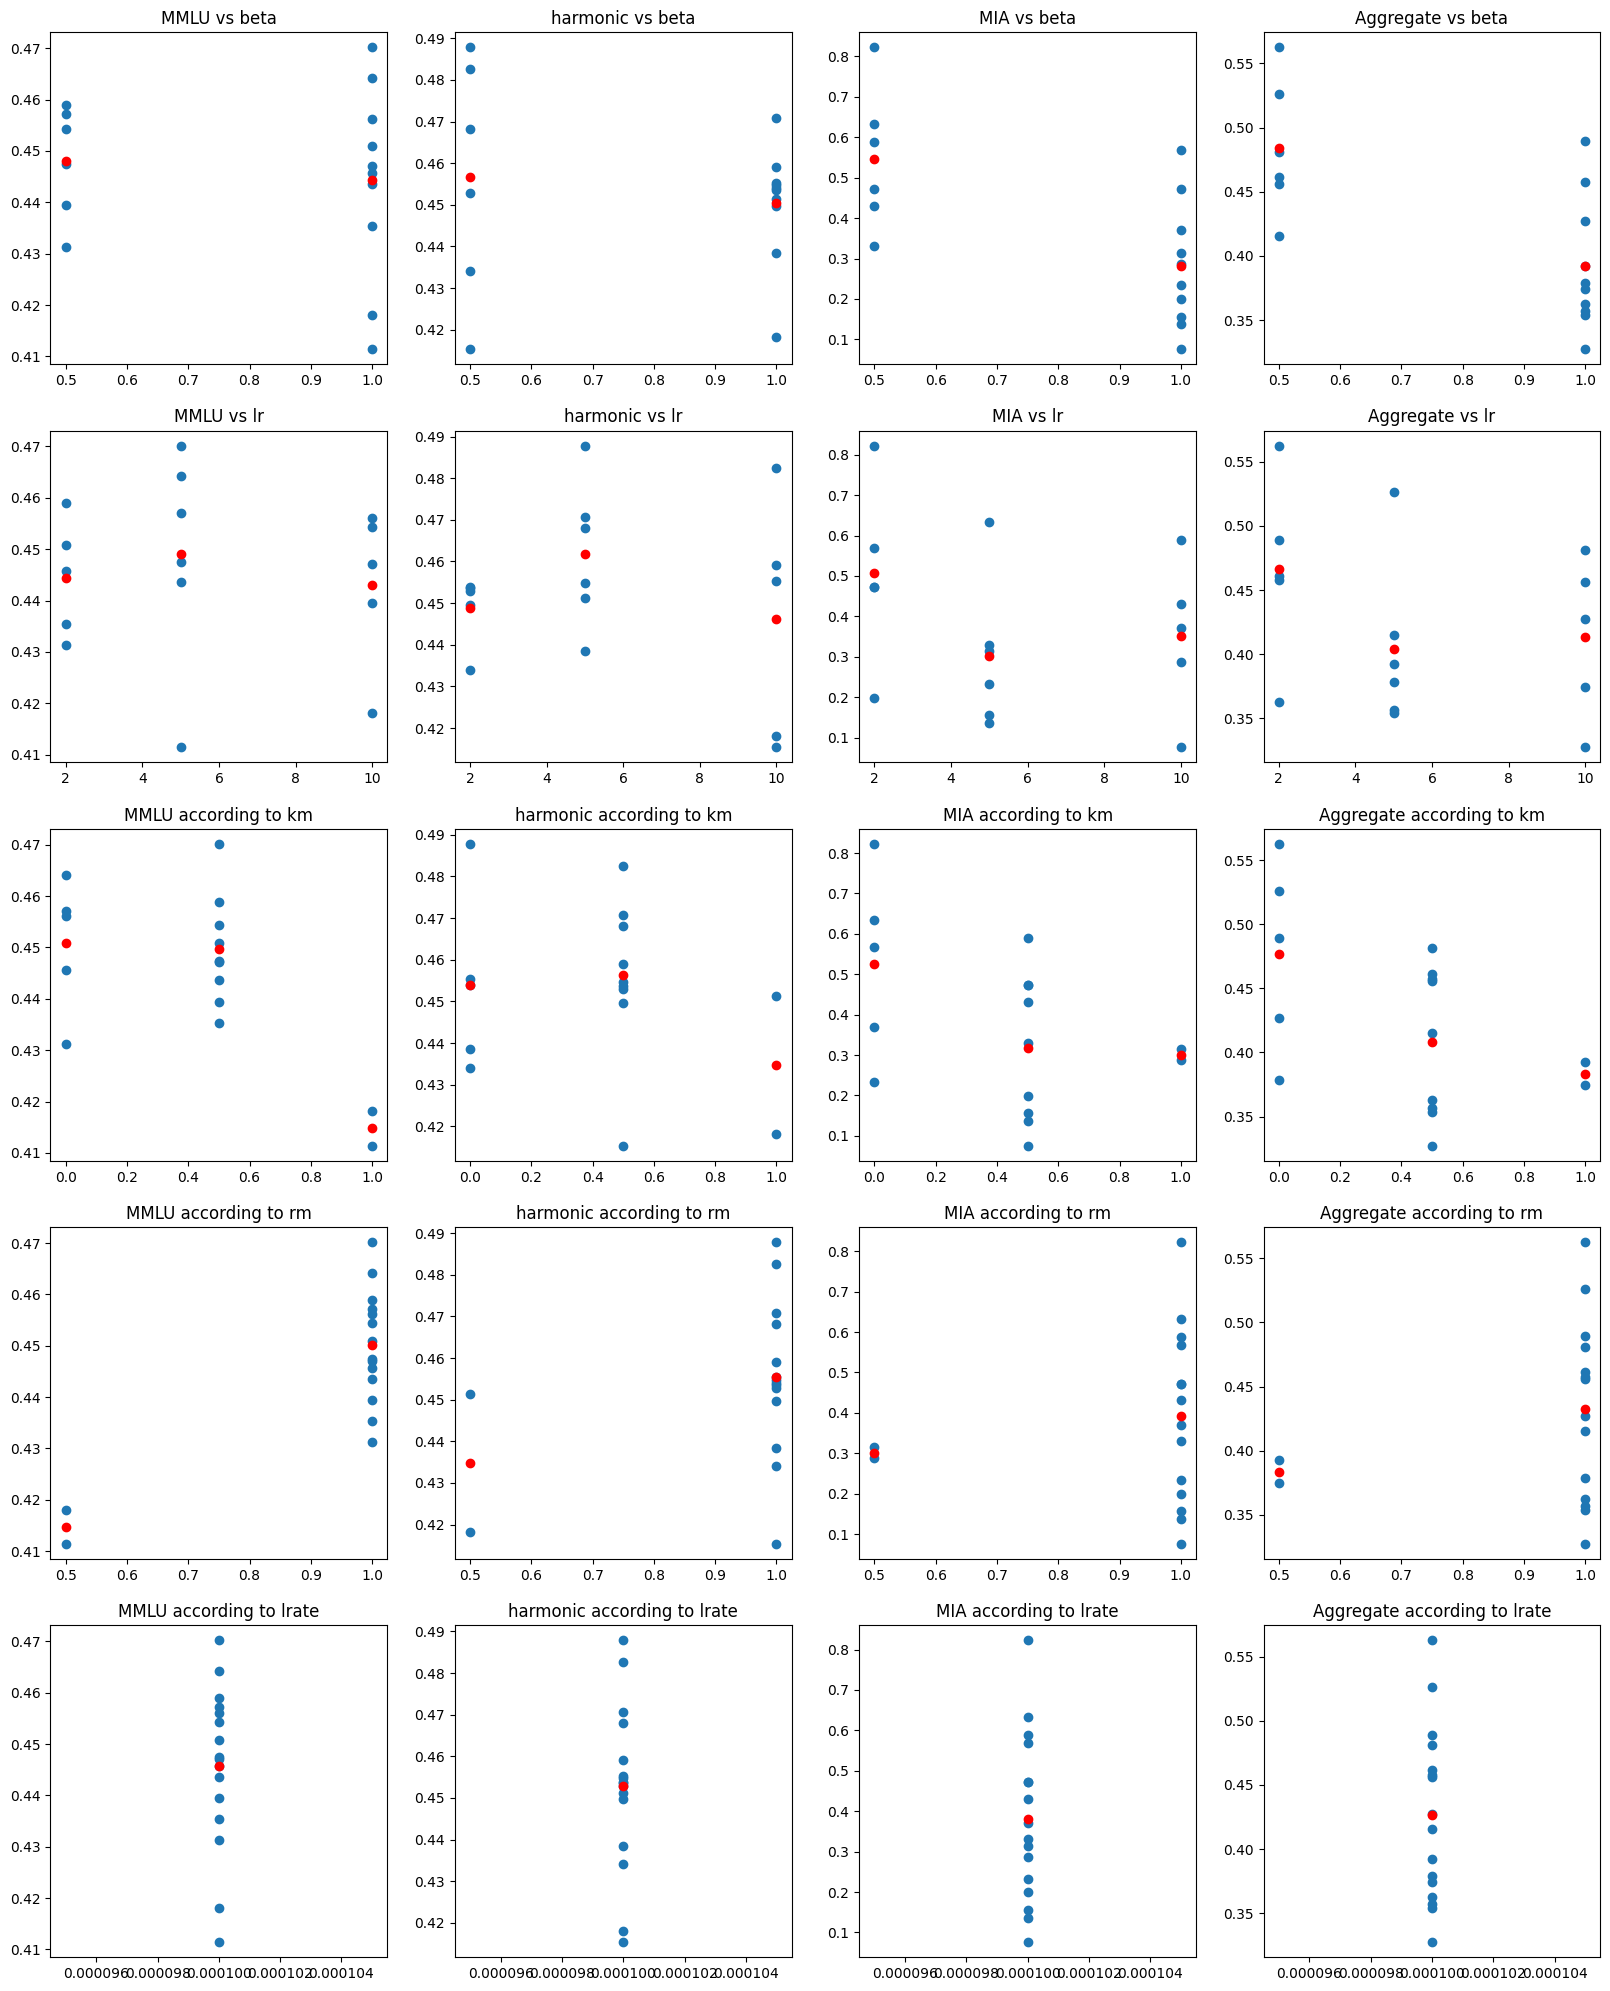

In [ ]:
dataf = [d for d in data if d["e"] != "0" and d['lrate'] == '0.0001']


def data_to_axs(data, param, value, ax: plt.Axes, title):
    ax.scatter([float(x[param]) for x in data], [x[value] for x in data], zorder=1)
    for p in set([float(x[param]) for x in data]):
        mean = numpy.mean(
            [
                x[value] if not math.isnan(x[value]) else 0.0
                for x in data
                if float(x[param]) == p
            ]
        )
        ax.scatter([p], [mean], c="r", zorder=1000)
    ax.set_title(title)


fig, axs = plt.subplots(5, 4, figsize=(20, 25))


data_to_axs(dataf, "b", "mmlu_average", axs[0, 0], "MMLU vs beta")
data_to_axs(dataf, "b", "harmonic-mean-task-aggregate", axs[0, 1], "harmonic vs beta")
data_to_axs(dataf, "b", "mia_final_score", axs[0, 2], "MIA vs beta")
data_to_axs(dataf, "b", "aggregate-score", axs[0, 3], "Aggregate vs beta")

data_to_axs(dataf, "lr", "mmlu_average", axs[1, 0], "MMLU vs lr")
data_to_axs(dataf, "lr", "harmonic-mean-task-aggregate", axs[1, 1], "harmonic vs lr")
data_to_axs(dataf, "lr", "mia_final_score", axs[1, 2], "MIA vs lr")
data_to_axs(dataf, "lr", "aggregate-score", axs[1, 3], "Aggregate vs lr")

data_to_axs(dataf, "km", "mmlu_average", axs[2, 0], "MMLU according to km")
data_to_axs(dataf, "km", "harmonic-mean-task-aggregate", axs[2, 1], "harmonic according to km")
data_to_axs(dataf, "km", "mia_final_score", axs[2, 2], "MIA according to km")
data_to_axs(dataf, "km", "aggregate-score", axs[2, 3], "Aggregate according to km")

data_to_axs(dataf, "rm", "mmlu_average", axs[3, 0], "MMLU according to rm")
data_to_axs(dataf, "rm", "harmonic-mean-task-aggregate", axs[3, 1], "harmonic according to rm")
data_to_axs(dataf, "rm", "mia_final_score", axs[3, 2], "MIA according to rm")
data_to_axs(dataf, "rm", "aggregate-score", axs[3, 3], "Aggregate according to rm")

data_to_axs(dataf, "lrate", "mmlu_average", axs[4, 0], "MMLU according to lrate")
data_to_axs(dataf, "lrate", "harmonic-mean-task-aggregate", axs[4, 1], "harmonic according to lrate", )
data_to_axs(dataf, "lrate", "mia_final_score", axs[4, 2], "MIA according to lrate")
data_to_axs(dataf, "lrate", "aggregate-score", axs[4, 3], "Aggregate according to lrate")


In [22]:
# best params on validation score:
best = max(data, key=lambda x: x["aggregate-score"])
pprint(best)

{'aggregate-score': 0.5625628900482813,
 'aggregated-terms': [0.585449520238202,
                      0.5833333333333333,
                      0.49697568798018577,
                      0.5739130434782609,
                      0.8141386017170154,
                      0.6764705882352942,
                      0.5178410552710051,
                      0.3333333333333333,
                      0.37063024013024015,
                      0.44,
                      0.20928204816749085,
                      0.32432432432432434],
 'b': '0.5',
 'bs': '4',
 'd': 'None',
 'e': '20',
 'ee': '5',
 'forget-set': {'Task1': {'knowledge-score': 0.4166666666666667,
                          'regurgitation-score': 0.41455047976179804},
                'Task2': {'knowledge-score': 0.4260869565217391,
                          'regurgitation-score': 0.5030243120198142},
                'Task3': {'knowledge-score': 0.3235294117647059,
                          'regurgitation-score': 0.1858613982829847